<a href="https://colab.research.google.com/github/Ric98/My-projects-w-python-and-R/blob/main/Customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print('hello world')

hello world


In [2]:
import os
os.getcwd()


'/content'

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/customer_segmentation_reduced.xlsx')

In [5]:
df.head()

,Record ID,Client ID,Order ID,Product Title,Product Type,Variant Title,Variant Sku,Variant ID,Day,Net Quantity,Gross Sales,Discounts,Returns,Net Sales,Taxes,Total Sales,Returned Item Quantity,Ordered Item Quantity
0,1,1312378,83290718932496,DPR,DPR,100,AD-982-708-895-F-6C894FB,52039657,04/12/2018,2,2000,-2000,0,0,0,0,0,2
1,2,3715657,36253792848113,RJF,Product P,28_A_MTM,83-490-E49-8C8-8-3B100BC,56914686,01/04/2019,2,1900,-1900,0,0,0,0,0,2
2,3,9533448,73094559597229,CLH,Product B,32_B_FtO,68-ECA-BC7-3B2-A-E73DE1B,24064862,05/11/2018,0,1648,-15656,-824,0,0,0,-2,2
3,4,4121004,53616575668264,NMA,Product F,40_B_FtO,6C-1F1-226-1B3-2-3542B41,43823868,19/02/2019,1,1190,-1190,0,0,0,0,0,1
4,5,4121004,29263220319421,NMA,Product F,40_B_FtO,6C-1F1-226-1B3-2-3542B41,43823868,19/02/2019,1,1190,-1190,0,0,0,0,0,1


In [6]:
df['Record ID']=df['Record ID'].astype(object)
df['Client ID']=df['Client ID'].astype(object)
df['Order ID']=df['Order ID'].astype(object)
df['Variant ID']=df['Variant ID'].astype(object)

In [7]:
df.describe()

,Net Quantity,Gross Sales,Discounts,Returns,Net Sales,Taxes,Total Sales,Returned Item Quantity,Ordered Item Quantity
count,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000
mean,1.042681,7168.819607,-1837.810270,-0.735579,5423.562854,1076.043348,940.166055,-0.002668,1.045348
std,0.228503,3314.154823,824.606193,21.316223,2558.361445,515.794066,1177.126503,0.057693,0.223557
min,0.000000,550.000000,-15656.000000,-824.000000,0.000000,0.000000,0.000000,-2.000000,1.000000
25%,1.000000,7917.000000,-2084.000000,0.000000,5833.000000,1167.000000,700.000000,0.000000,1.000000
50%,1.000000,7917.000000,-2084.000000,0.000000,5833.000000,1167.000000,700.000000,0.000000,1.000000
75%,1.000000,8251.000000,-2084.000000,0.000000,6167.000000,1233.000000,1032.000000,0.000000,1.000000
max,4.000000,31668.000000,-215.000000,0.000000,29583.000000,5917.000000,15841.000000,0.000000,4.000000


In [8]:
df['Day']=pd.to_datetime(df['Day'], errors='coerce', format='%d/%m/%Y')

In [9]:
df.head()

,Record ID,Client ID,Order ID,Product Title,Product Type,Variant Title,Variant Sku,Variant ID,Day,Net Quantity,Gross Sales,Discounts,Returns,Net Sales,Taxes,Total Sales,Returned Item Quantity,Ordered Item Quantity
0,1,1312378,83290718932496,DPR,DPR,100,AD-982-708-895-F-6C894FB,52039657,2018-12-04,2,2000,-2000,0,0,0,0,0,2
1,2,3715657,36253792848113,RJF,Product P,28_A_MTM,83-490-E49-8C8-8-3B100BC,56914686,2019-04-01,2,1900,-1900,0,0,0,0,0,2
2,3,9533448,73094559597229,CLH,Product B,32_B_FtO,68-ECA-BC7-3B2-A-E73DE1B,24064862,2018-11-05,0,1648,-15656,-824,0,0,0,-2,2
3,4,4121004,53616575668264,NMA,Product F,40_B_FtO,6C-1F1-226-1B3-2-3542B41,43823868,2019-02-19,1,1190,-1190,0,0,0,0,0,1
4,5,4121004,29263220319421,NMA,Product F,40_B_FtO,6C-1F1-226-1B3-2-3542B41,43823868,2019-02-19,1,1190,-1190,0,0,0,0,0,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Record ID               2999 non-null   object        
 1   Client ID               2999 non-null   object        
 2   Order ID                2999 non-null   object        
 3   Product Title           2999 non-null   object        
 4   Product Type            2999 non-null   object        
 5   Variant Title           2999 non-null   object        
 6   Variant Sku             2999 non-null   object        
 7   Variant ID              2999 non-null   object        
 8   Day                     2999 non-null   datetime64[ns]
 9   Net Quantity            2999 non-null   int64         
 10  Gross Sales             2999 non-null   int64         
 11  Discounts               2999 non-null   int64         
 12  Returns                 2999 non-null   int64   

In [11]:
corr = df.corr()
corr.style.background_gradient(cmap='YlGnBu', axis=1)

,Net Quantity,Gross Sales,Discounts,Returns,Net Sales,Taxes,Total Sales,Returned Item Quantity,Ordered Item Quantity
Net Quantity,1.000000,0.385819,-0.084897,0.157515,0.352742,0.338748,0.216322,0.211056,0.967661
Gross Sales,0.385819,1.000000,-0.722134,0.062968,0.892956,0.900862,-0.047786,0.086023,0.372157
Discounts,-0.084897,-0.722134,1.000000,0.270160,-0.707701,-0.709383,-0.024583,0.233671,-0.147078
Returns,0.157515,0.062968,0.270160,1.000000,0.073179,0.072014,0.027571,0.820231,-0.050674
Net Sales,0.352742,0.892956,-0.707701,0.073179,1.000000,0.975786,0.185032,0.098053,0.335244
Taxes,0.338748,0.900862,-0.709383,0.072014,0.975786,1.000000,0.067654,0.096492,0.321343
Total Sales,0.216322,-0.047786,-0.024583,0.027571,0.185032,0.067654,1.000000,0.036942,0.211575
Returned Item Quantity,0.211056,0.086023,0.233671,0.820231,0.098053,0.096492,0.036942,1.000000,-0.042341
Ordered Item Quantity,0.967661,0.372157,-0.147078,-0.050674,0.335244,0.321343,0.211575,-0.042341,1.000000


In [12]:
#DF SENZA TASSE 
new_df=df.loc[:, df.columns!='Taxes']
new_df.head()

#DF SENZA NET SALES 

new_new_df=df.loc[:, df.columns!='Net Sales']
new_new_df.head()

,Record ID,Client ID,Order ID,Product Title,Product Type,Variant Title,Variant Sku,Variant ID,Day,Net Quantity,Gross Sales,Discounts,Returns,Taxes,Total Sales,Returned Item Quantity,Ordered Item Quantity
0,1,1312378,83290718932496,DPR,DPR,100,AD-982-708-895-F-6C894FB,52039657,2018-12-04,2,2000,-2000,0,0,0,0,2
1,2,3715657,36253792848113,RJF,Product P,28_A_MTM,83-490-E49-8C8-8-3B100BC,56914686,2019-04-01,2,1900,-1900,0,0,0,0,2
2,3,9533448,73094559597229,CLH,Product B,32_B_FtO,68-ECA-BC7-3B2-A-E73DE1B,24064862,2018-11-05,0,1648,-15656,-824,0,0,-2,2
3,4,4121004,53616575668264,NMA,Product F,40_B_FtO,6C-1F1-226-1B3-2-3542B41,43823868,2019-02-19,1,1190,-1190,0,0,0,0,1
4,5,4121004,29263220319421,NMA,Product F,40_B_FtO,6C-1F1-226-1B3-2-3542B41,43823868,2019-02-19,1,1190,-1190,0,0,0,0,1


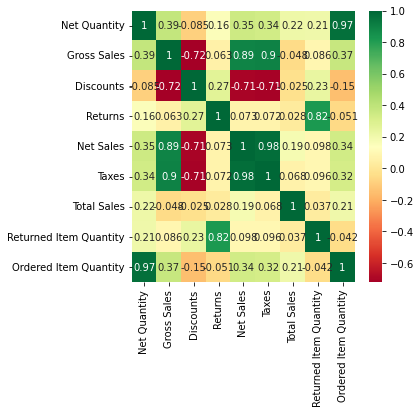

In [13]:
#CORRELATION MATRIX WITH TAXES 
corrmat=df.corr()
top_corr=corrmat.index
plt.figure(figsize=(5,5))



g=sns.heatmap(df[top_corr].corr(), annot=True, cmap="RdYlGn")

#le variabili tra loro più correlate sono: 
# - gross sales - net sales
# - gross sales - taxes
# - gross sales - discounts 
# - 

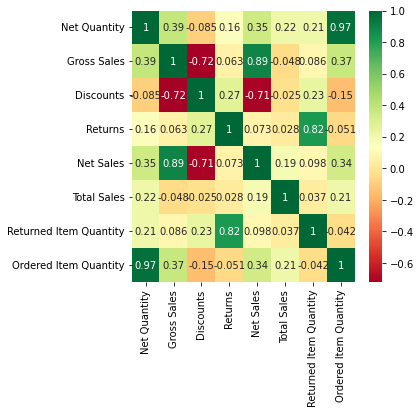

In [14]:
#CORRELATION MATRIX WITHOUT TAXES 
corrmat=new_df.corr()
top_corr=corrmat.index
plt.figure(figsize=(5,5))



g=sns.heatmap(new_df[top_corr].corr(), annot=True, cmap="RdYlGn")

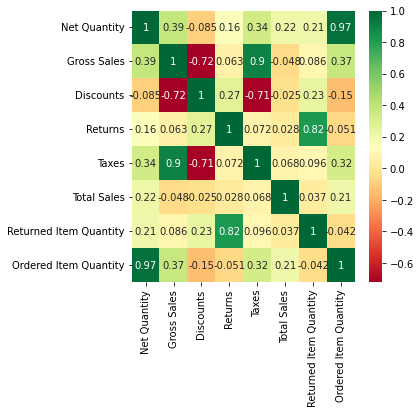

In [15]:
#CORRELATION MATRIX WITHOUT NET SALE

corrmat=new_new_df.corr()
top_corr=corrmat.index
plt.figure(figsize=(5,5))



g=sns.heatmap(new_new_df[top_corr].corr(), annot=True, cmap="RdYlGn")

In [16]:
# DF WITHOUT TAXES, NETSALES, ORDER ITEM QUANTITY, RETURNS 
dfclean=df.loc[:, ~df.columns.isin(['Taxes', 'Net Sales', 'Ordered Item Quantity', 'Returns'])]
dfclean.head()

,Record ID,Client ID,Order ID,Product Title,Product Type,Variant Title,Variant Sku,Variant ID,Day,Net Quantity,Gross Sales,Discounts,Total Sales,Returned Item Quantity
0,1,1312378,83290718932496,DPR,DPR,100,AD-982-708-895-F-6C894FB,52039657,2018-12-04,2,2000,-2000,0,0
1,2,3715657,36253792848113,RJF,Product P,28_A_MTM,83-490-E49-8C8-8-3B100BC,56914686,2019-04-01,2,1900,-1900,0,0
2,3,9533448,73094559597229,CLH,Product B,32_B_FtO,68-ECA-BC7-3B2-A-E73DE1B,24064862,2018-11-05,0,1648,-15656,0,-2
3,4,4121004,53616575668264,NMA,Product F,40_B_FtO,6C-1F1-226-1B3-2-3542B41,43823868,2019-02-19,1,1190,-1190,0,0
4,5,4121004,29263220319421,NMA,Product F,40_B_FtO,6C-1F1-226-1B3-2-3542B41,43823868,2019-02-19,1,1190,-1190,0,0


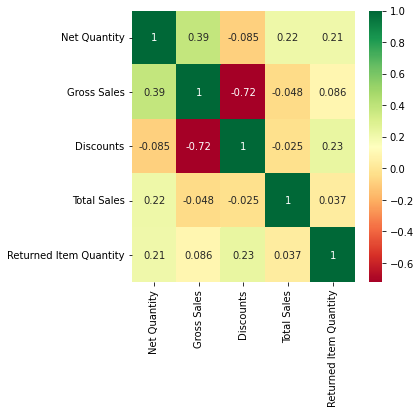

In [17]:
#CORRELATION MATRIX WITHOUT TAXES, NETSALES, ORDER ITEM QUANTITY, RETURNS
corrmat=dfclean.corr()
top_corr=corrmat.index
plt.figure(figsize=(5,5))



g=sns.heatmap(dfclean[top_corr].corr(), annot=True, cmap="RdYlGn")

In [18]:
dfclean.columns

Index(['Record ID', 'Client ID', 'Order ID', 'Product Title', 'Product Type',
       'Variant Title', 'Variant Sku', 'Variant ID', 'Day', 'Net Quantity',
       'Gross Sales', 'Discounts', 'Total Sales', 'Returned Item Quantity'],
      dtype='object')

In [19]:
dfclean.describe()

,Net Quantity,Gross Sales,Discounts,Total Sales,Returned Item Quantity
count,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000
mean,1.042681,7168.819607,-1837.810270,940.166055,-0.002668
std,0.228503,3314.154823,824.606193,1177.126503,0.057693
min,0.000000,550.000000,-15656.000000,0.000000,-2.000000
25%,1.000000,7917.000000,-2084.000000,700.000000,0.000000
50%,1.000000,7917.000000,-2084.000000,700.000000,0.000000
75%,1.000000,8251.000000,-2084.000000,1032.000000,0.000000
max,4.000000,31668.000000,-215.000000,15841.000000,0.000000


In [20]:
for i in df.columns:
  if df[i].dtype == object:
    print(df[i].value_counts())

1       1
2004    1
1995    1
1996    1
1997    1
       ..
1003    1
1004    1
1005    1
1006    1
2999    1
Name: Record ID, Length: 2999, dtype: int64
4121004    10
4489293     8
4780147     5
3715657     5
2945846     5
           ..
5639967     1
3066884     1
4765946     1
8962181     1
8831946     1
Name: Client ID, Length: 2583, dtype: int64
94009904842157    5
75242803382039    4
55114404243836    4
29263220319421    4
20656006517410    4
                 ..
21103890256934    1
63750438864825    1
18026769923867    1
50806342451305    1
34813118608702    1
Name: Order ID, Length: 2858, dtype: int64
WHX    1165
RJF     385
XEB     232
LQS     194
QID     140
VXH     130
CLH     109
KNB      90
ZQV      58
YMR      53
OTH      52
AYN      41
NMA      39
TSH      36
OUT      36
YQX      35
MTW      33
HZX      30
NSP      28
RIH      25
YYI      19
JAF      12
MAG      12
QMB       9
DPR       8
UQJ       6
EXR       5
RJK       4
DAL       3
NWB       3
EYV       3
INU       2
O

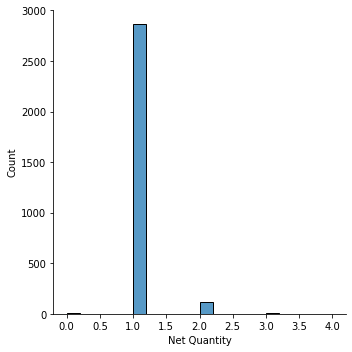

In [21]:
#check distribution 
# ['Net Quantity', 'Gross Sales', 'Discounts', 'Total Sales', 'Returned Item Quantity']

sns.displot(dfclean, x="Net Quantity", binwidth=0.2)



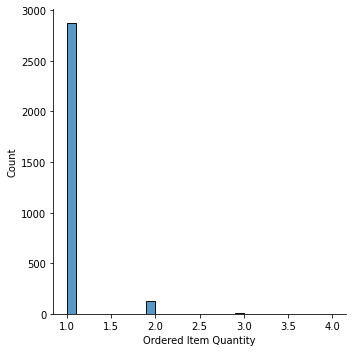

In [22]:
sns.displot(df, x="Ordered Item Quantity", binwidth=0.1)

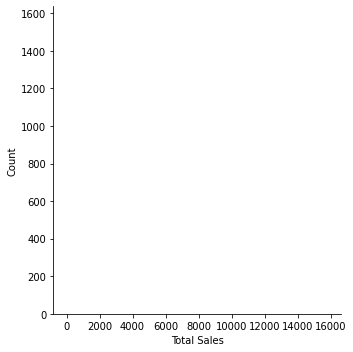

In [23]:
sns.displot(df, x="Total Sales", binwidth=0.1)

In [24]:
#sns.displot(dfclean, x="Gross Sales", binwidth=0.2)

In [25]:
#sns.displot(dfclean, x="Discounts", binwidth=0.2)

In [26]:
#sns.displot(dfclean, x="Total Sales", binwidth=0.2)

In [27]:
#sns.displot(dfclean, x="Returned Item Quantity", binwidth=0.2)

In [28]:
final_data=df.loc[:, ~df.columns.isin(['Taxes', 'Net Sales',  'Returns', 'Net Quantity', 'Record ID', 'Client ID', 'Order ID', 'Product Title', 'Product Type','Variant Title','Variant Sku','Variant ID', 'Day'])]
final_data.head()

,Gross Sales,Discounts,Total Sales,Returned Item Quantity,Ordered Item Quantity
0,2000,-2000,0,0,2
1,1900,-1900,0,0,2
2,1648,-15656,0,-2,2
3,1190,-1190,0,0,1
4,1190,-1190,0,0,1


In [31]:
### carichiamo il dataset pulito in cui andremo ad applicare K-Means e DBSCAN

df_final=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/df_final.csv')

df_final.head()


,client_id,gross_sales,discounts,total_sales,returned_item_quantity,ordered_item_quantity
0,6499122.0,7917,-7417,60,0,1
1,4203330.0,1075,-645,516,0,1
2,4737903.0,15910,-5541,1228,0,3
3,5934972.0,9918,-5951,476,0,1
4,2680640.0,21582,-12949,1036,0,5


In [36]:
#mi creo il dataset senza ID cliente e senza returned item quantity

df_cluster=df_final.loc[:, ~df_final.columns.isin(['client_id', 'returned_item_quantity'])]

df_cluster.head()

,gross_sales,discounts,total_sales,ordered_item_quantity
0,7917,-7417,60,1
1,1075,-645,516,1
2,15910,-5541,1228,3
3,9918,-5951,476,1
4,21582,-12949,1036,5


In [37]:
from sklearn.cluster import KMeans

In [45]:
#differenti metodi di standardizzazione: Proviamo Z-Score e Min maax 
import scipy.stats as stats

In [46]:
## Z_SCORE
Z_data= stats.zscore(df_cluster)

In [55]:
#Min-Max scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(df_cluster))
min_max_data=scaler.transform(df_cluster)



MinMaxScaler()
[[0.09291092 0.7904324  0.00132509 0.        ]
 [0.00662118 0.98748763 0.01139576 0.        ]
 [0.19371682 0.84502124 0.02712014 0.22222222]
 ...
 [0.08660504 0.94561485 0.01413428 0.        ]
 [0.08660504 0.94561485 0.01413428 0.        ]
 [0.08660504 0.94561485 0.01413428 0.        ]]


Cluster 1 Inertia 79680904085.20648
Cluster 2 Inertia 40402601479.41874
Cluster 3 Inertia 23806678085.718662
Cluster 4 Inertia 13182247574.587831
Cluster 5 Inertia 7210396579.676243
Cluster 6 Inertia 5449609763.953384
Cluster 7 Inertia 4261657933.4646883
Cluster 8 Inertia 3302311298.411699
Cluster 9 Inertia 2363813353.4930577
Cluster 10 Inertia 1912721483.9930253
Cluster 11 Inertia 1669437747.3068779
Cluster 12 Inertia 1445649744.8650913
Cluster 13 Inertia 1231223598.2512937
Cluster 14 Inertia 1128708884.878021
Cluster 15 Inertia 1055006828.8115811
Cluster 16 Inertia 941430375.5335889
Cluster 17 Inertia 841275054.079221
Cluster 18 Inertia 777953878.5678781
Cluster 19 Inertia 695292787.6323601


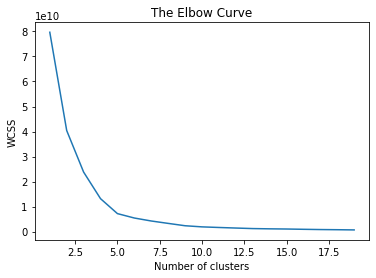

In [39]:
#k-means con Z_data

wcss = []
for i in range(1,20):
 kmeans = KMeans(n_clusters=i,init="k-means++", max_iter=300,n_init=10,random_state=0)
 kmeans.fit(df_cluster)
 wcss.append(kmeans.inertia_)
 print("Cluster", i, "Inertia", kmeans.inertia_)
plt.plot(range(1,20),wcss)
plt.title("The Elbow Curve")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS") ##WCSS stands for total within-cluster sum of square
plt.show()

Cluster 1 Inertia 10136.000000000167
Cluster 2 Inertia 6117.334796704958
Cluster 3 Inertia 4505.5188457881095
Cluster 4 Inertia 3532.2535313806916
Cluster 5 Inertia 2592.4403223198537
Cluster 6 Inertia 1832.7543656729129
Cluster 7 Inertia 1201.5824754214345
Cluster 8 Inertia 1066.4381961525364
Cluster 9 Inertia 923.9298932382292
Cluster 10 Inertia 806.7319098297132
Cluster 11 Inertia 692.2951983853847
Cluster 12 Inertia 582.3647550475632
Cluster 13 Inertia 477.063438957158
Cluster 14 Inertia 427.25845509413915
Cluster 15 Inertia 376.65177026509696
Cluster 16 Inertia 318.6578516343492
Cluster 17 Inertia 290.9351374114087
Cluster 18 Inertia 259.5437168519204
Cluster 19 Inertia 234.6911675576035


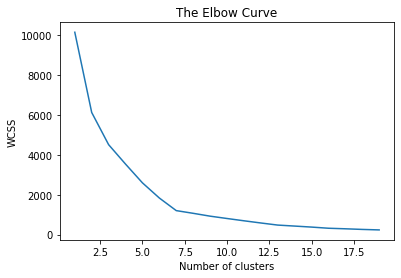

In [56]:
## min_max_data
wcss = []
for i in range(1,20):
 kmeans = KMeans(n_clusters=i,init="k-means++", max_iter=300,n_init=10,random_state=0)
 kmeans.fit(Z_data)
 wcss.append(kmeans.inertia_)
 print("Cluster", i, "Inertia", kmeans.inertia_)
plt.plot(range(1,20),wcss)
plt.title("The Elbow Curve")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS") ##WCSS stands for total within-cluster sum of square
plt.show()


Cluster 1 Inertia 30.140652897782783
Cluster 2 Inertia 15.526472130939872
Cluster 3 Inertia 10.622908997597031
Cluster 4 Inertia 7.255451565523922
Cluster 5 Inertia 4.87970970912915
Cluster 6 Inertia 3.9624451844975224
Cluster 7 Inertia 3.3369411076509787
Cluster 8 Inertia 2.8026782672623654
Cluster 9 Inertia 2.3184168665429397
Cluster 10 Inertia 1.90720847847379
Cluster 11 Inertia 1.6391879831840952
Cluster 12 Inertia 1.4165295514974667
Cluster 13 Inertia 1.2521978818893118
Cluster 14 Inertia 1.1108587476058835
Cluster 15 Inertia 0.9637302147011092
Cluster 16 Inertia 0.8195959743317943
Cluster 17 Inertia 0.7507355944888131
Cluster 18 Inertia 0.6723542676942825
Cluster 19 Inertia 0.5486538693030218


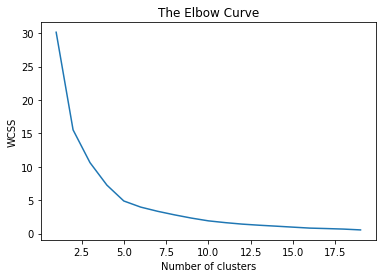

In [57]:
wcss = []
for i in range(1,20):
 kmeans = KMeans(n_clusters=i,init="k-means++", max_iter=300,n_init=10,random_state=0)
 kmeans.fit(min_max_data)
 wcss.append(kmeans.inertia_)
 print("Cluster", i, "Inertia", kmeans.inertia_)
plt.plot(range(1,20),wcss)
plt.title("The Elbow Curve")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS") ##WCSS stands for total within-cluster sum of square
plt.show()

In [58]:
## dal grafico a gomito vediamo come sia k-means Z che k-means min max ci danno un numero ottimale di 5-6 cluster. Tuttavia la scelta 
## è quella di dividere i clienti in 3-4 cluster perchè da questi si nota una buona e omogenea rappresentazione della segmentazione!